In [71]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

In [101]:
#list of cryptocurrency pairs from Coimbase

url = 'https://api.pro.coinbase.com/products'
data = requests.get(url).json()
df = pd.DataFrame.from_dict(data).set_index("id")
df.drop(["base_increment", "margin_enabled", "post_only", "limit_only", "cancel_only", "trading_disabled", "status_message"], axis=1, inplace=True)
df

,base_currency,quote_currency,base_min_size,base_max_size,quote_increment,display_name,min_market_funds,max_market_funds,status
id,,,,,,,,,
USDT-GBP,USDT,GBP,1,260000,0.0001,USDT/GBP,5,100000,online
BCH-EUR,BCH,EUR,0.01,100,0.01,BCH/EUR,10,300000,online
LINK-EUR,LINK,EUR,0.1,90000,0.00001,LINK/EUR,10,100000,online
UMA-GBP,UMA,GBP,0.01,4500,0.001,UMA/GBP,1.0,100000,online
STORJ-BTC,STORJ,BTC,1,280000,0.00000001,STORJ/BTC,0.0001,2,online
...,...,...,...,...,...,...,...,...,...
USDC-EUR,USDC,EUR,1,250000,0.001,USDC/EUR,5.0,100000,online
KNC-BTC,KNC,BTC,1,600000,0.00000001,KNC/BTC,0.001,30,online
BAT-USDC,BAT,USDC,1,800000,0.000001,BAT/USDC,10,100000,online


In [95]:
#Dataset 1 semestre 2020 (price BTC-USD pair)

url_1semestreBTCUSD = 'https://api.pro.coinbase.com/products/BTC-USD/candles?start=2020-01-01T00:00:00&end=2020-07-01T00:00:00&granularity=86400'
data_1semestreBTCUSD = requests.get(url_1semestreBTCUSD).json()
df_1semestreBTCUSD = pd.DataFrame.from_dict(data_1semestreBTCUSD)
df_1semestreBTCUSD.columns = ["time", "low", "high", "open", "close", "volume"]
df_1semestreBTCUSD.drop(["low", "high", "open"], axis=1, inplace=True)
df_1semestreBTCUSD.set_index("time", inplace=True)
df_1semestreBTCUSD

,close,volume
time,,
1593561600,9239.97,7550.159997
1593475200,9136.20,6820.867409
1593388800,9184.45,8658.426725
1593302400,9113.24,5537.757506
1593216000,9002.46,8507.268410
...,...,...
1578182400,7355.40,5942.014946
1578096000,7348.63,4742.466210
1578009600,7334.45,14056.392385


<AxesSubplot:title={'center':'BTC-USD Daily price action'}, xlabel='time'>

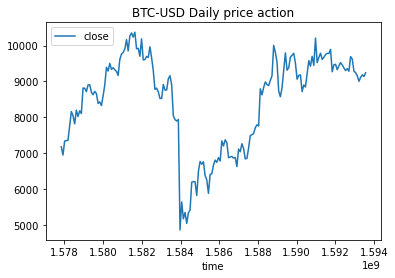

In [96]:
df_1semestreBTCUSD.plot(kind="line", y="close", title="BTC-USD Daily price action")

<AxesSubplot:title={'center':'BTC-USD Daily volume'}, xlabel='time'>

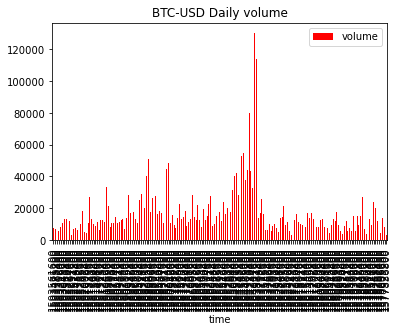

In [99]:
df_1semestreBTCUSD.plot(kind="bar", y="volume", title="BTC-USD Daily volume", color="r")

In [104]:
url_btc = 'https://api.pro.coinbase.com/currencies/BTC'
data_btc = requests.get(url_btc).json()
btc = pd.DataFrame.from_dict(data_btc)
btc

,id,name,min_size,status,message,details,max_precision
crypto_address_link,BTC,Bitcoin,0.00000001,online,,https://live.blockcypher.com/btc/address/{{add...,0.00000001
crypto_transaction_link,BTC,Bitcoin,0.00000001,online,,https://live.blockcypher.com/btc/tx/{{txId}},0.00000001
group_types,BTC,Bitcoin,0.00000001,online,,"[btc, crypto]",0.00000001
max_withdrawal_amount,BTC,Bitcoin,0.00000001,online,,500,0.00000001
min_withdrawal_amount,BTC,Bitcoin,0.00000001,online,,0.0001,0.00000001
network_confirmations,BTC,Bitcoin,0.00000001,online,,3,0.00000001
push_payment_methods,BTC,Bitcoin,0.00000001,online,,[crypto],0.00000001
sort_order,BTC,Bitcoin,0.00000001,online,,20,0.00000001
symbol,BTC,Bitcoin,0.00000001,online,,₿,0.00000001
type,BTC,Bitcoin,0.00000001,online,,crypto,0.00000001
